In [ ]:
URK21CS1004                                                          20/09/2023

In [ ]:
AIM: To demonstrate Performance Analysis on KNN Classification Technique

In [ ]:
DESCRIPTION:
    K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. The following two properties would define KNN well:
Lazy learning algorithm: KNN is a lazy learning algorithm because it does not have a specialized training phase and uses all the data for training while classification. 
Non-parametric learning algorithm: KNN is also a non-parametric learning algorithm because it doesn't assume anything about the underlying data.
Working of KNN Algorithm
    K-nearest neighbors (KNN) algorithm uses 'feature similarity' to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set. We can understand its working with the help of following steps:
Step1: For implementing any algorithm, we need dataset. So, during the first step of KNN, load the training as well as test data. 
Step2: Choose the value of K i.e. the nearest data points. K can be any integer. 
Step3: For each point in the test data do the following: 
    3.1: Calculate the distance between test data and each row of training data with the help of any of the method namely: Euclidean, Manhattan or Hamming distance. The most commonly used method to calculate distance is Euclidean. 
    3.2: Now, based on the distance value, sort them in ascending order. 
    3.3: Next, it will choose the top K rows from the sorted array. 3.4: Now, it will assign a class to the test point based on most frequent class of these rows. Step4: End Performance Metrics for Classification Problems
Various performance metrics that can be used to evaluate predictions for classification problems are given below
Confusion Matrix
 It is the easiest way to measure the performance of a classification problem where the output can be of two or more type of classes. A confusion matrix is nothing but a table with two dimensions viz."Actual" and "Predicted" and furthermore, both the dimensions have "True Positives (TP)", "True Negatives (TN)", "False Positives (FP)", "False Negatives (FN)"
True Positives (TP): It is the case when both actual class and predicted class of data point is 1. True Negatives (TN): It is the case when both actual class and predicted class of data point is 0. False Positives (FP): It is the case when actual class of data point is 0 & predicted class of data point is 1. False Negatives (FN): It is the case when actual class of data point is 1 & predicted class of 1 data point is 0. confusion_matrix function of sklearn.metrics to compute Confusion Matrix of our classification model. 
Classification Accuracy
 It is most common performance metric for classification algorithms. It may be defined as the number of correct predictions made as a ratio of all predictions made. accuracy_score function of sklearn.metrics is used to compute accuracy of the classification model.
Classification Report
    This report consists of the scores of Precisions, Recall, F1 and Support. They are Precision, used in document retrievals, may be defined as the number of correct documents returned by classification model.
Recall or Sensitivity
Recall may be defined as the number of positives returned by classification model. It can be calculated from the confusion matrix
Specificity
 Specificity, in contrast to recall, may be defined as the number of negatives returned by the classification model. Support may be defined as the number of samples of the true response that lies in each class of target values. F1 Score This score will give us the harmonic mean of precision and recall. Mathematically, F1 score is the weighted average of the precision and recall. The best value of F1 would be 1 and worst would be 0. F1 score will be calculated with the help of following formula: F1 = 2 * (precision * recall) / (precision + recall) F1 score is having equal relative contribution of precision and recall. classification_report function of sklearn.metrics is used to get the classification report of classification model.
AUC (Area Under ROC curve)
    AUC (Area Under Curve)-ROC (Receiver Operating Characteristic) is a performance metric, based on varying threshold values, for classification problems. As name suggests, ROC is a probability curve and AUC measure the separability. In simple words, AUC-ROC metric will tell us about the capability of model in distinguishing the classes. Higher the AUC, better the model. Mathematically, it can be created by plotting TPR (True Positive Rate) i.e. Sensitivity or recall vs FPR (False Positive Rate) i.e. 1-Specificity, at various threshold values. roc_auc_score function of sklearn.metrics is used to compute AUC-ROC

In [ ]:
PROGRAMS:

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, f1_score

In [ ]:
import sklearn
dir(sklearn.metrics)

In [ ]:
1. Develop a KNN classification model for the wine dataset using the scikit-learn

In [ ]:
a. Read the data

In [42]:
print("BISWAYAN MEHRA \nURK21CS1004")
data = pd.read_csv('wine.csv')
data.head(2)

BISWAYAN MEHRA 
URK21CS1004


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.0,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,bad


In [ ]:
b. Data Cleaning
    a. Replace 0 in ['chlorides', 'density', 'pH', 'sulphates'] column with NaN value
    b. Identify the columns with null value
    c. Filling the null values by imputing the mean values in the corresponding column

In [43]:
print("BISWAYAN MEHRA \nURK21CS1004")
cols_to_replace_zero = ['chlorides', 'density', 'pH', 'sulphates']
data[cols_to_replace_zero] = data[cols_to_replace_zero].replace(0, float('nan'))
columns_with_null = data.columns[data.isnull().any()].tolist()
data[columns_with_null] = data[columns_with_null].fillna(data.mean(numeric_only=True))
print(columns_with_null)

BISWAYAN MEHRA 
URK21CS1004
['citric acid', 'residual sugar', 'chlorides', 'density', 'pH', 'sulphates']


In [ ]:
c. Use the columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide'] as the independent variables

In [44]:
print("BISWAYAN MEHRA \nURK21CS1004")
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide']]
X.head(2)

BISWAYAN MEHRA 
URK21CS1004


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide
0,7.4,0.70,0.0,1.9,0.076,11.0
1,7.8,0.88,0.0,2.6,0.098,25.0


In [ ]:
d. Use the target variable as 'quality' ('good' and 'bad' based on score >5 and <5)

In [45]:
print("BISWAYAN MEHRA \nURK21CS1004")
y = data['quality']
y.head(4)

BISWAYAN MEHRA 
URK21CS1004


0     bad
1     bad
2     bad
3    good
Name: quality, dtype: object

In [ ]:
e. Encode the categorical value of the target column to numerical value

In [46]:
print("BISWAYAN MEHRA \nURK21CS1004")
y = y.replace({'good':0, 'bad':1})
y.head(4)

BISWAYAN MEHRA 
URK21CS1004


0    1
1    1
2    1
3    0
Name: quality, dtype: int64

In [ ]:
f. Divide the data into training (75%) and testing set (25%)

In [47]:
print("BISWAYAN MEHRA \nURK21CS1004")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

BISWAYAN MEHRA 
URK21CS1004


In [ ]:
g. Perform the classification with K=3

In [48]:
print("BISWAYAN MEHRA \nURK21CS1004")
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

BISWAYAN MEHRA 
URK21CS1004


KNeighborsClassifier(n_neighbors=3)

In [ ]:
h. Analyse the performance of the classifier with various performance measures and display such as confusion matrix, accuracy, recall, precision, specificity, f-score, Receiver operating characteristic (ROC) curve and Area Under Curve (AUC) score

BISWAYAN MEHRA 
URK21CS1004
Confusion Matrix:
 [[73 61]
 [37 79]]
Accuracy: 0.608
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.54      0.60       134
           1       0.56      0.68      0.62       116

    accuracy                           0.61       250
   macro avg       0.61      0.61      0.61       250
weighted avg       0.62      0.61      0.61       250

Precision: 0.5642857142857143
Recall: 0.6810344827586207
Specificity: 0.5447761194029851
F-score: 0.6171874999999999


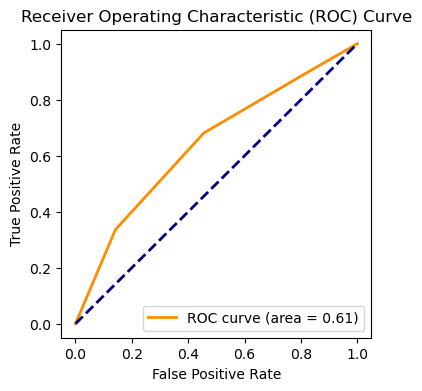

AUC Score: 0.6129053010808028


In [51]:
print("BISWAYAN MEHRA \nURK21CS1004")

y_pred = knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
f_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F-score:", f1_score(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)


In [ ]:
i. Change the value of K in KNN with 5,7,9,11 and tabulate the various TP, TN, accuracy, f-score and AUC score obtained

In [36]:
print("BISWAYAN MEHRA \nURK21CS1004")
for i in [5,7,9,11]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("AUC Score:", roc_auc_score(y_test, y_pred))

BISWAYAN MEHRA 
URK21CS1004
Confusion Matrix:
 [[68 66]
 [46 70]]
Accuracy: 0.552
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.51      0.55       134
           1       0.51      0.60      0.56       116

    accuracy                           0.55       250
   macro avg       0.56      0.56      0.55       250
weighted avg       0.56      0.55      0.55       250

AUC Score: 0.5554554812146166
Confusion Matrix:
 [[64 70]
 [43 73]]
Accuracy: 0.548
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.48      0.53       134
           1       0.51      0.63      0.56       116

    accuracy                           0.55       250
   macro avg       0.55      0.55      0.55       250
weighted avg       0.56      0.55      0.55       250

AUC Score: 0.5534611425630469
Confusion Matrix:
 [[68 66]
 [42 74]]
Accuracy: 0.568
Classification Report:
               precision 

In [ ]:
j. Analyse and infer for which K value, the classification algorithm provides better performance.

In [ ]:
print("BISWAYAN MEHRA \nURK21CS1004")
The K value of n_neighbors = 9 provides better performance for the classification algorithm. This conclusion is based on the higher accuracy (0.568) and higher AUC score (0.5727) compared to the other tested K values (5, 7, and 11).

In [ ]:
RESULT:
    Thus, the programs To demonstrate Performance Analysis on KNN Classification Technique using Python was executed and verified successfully.